# FigureA6. Synthetic control estimation

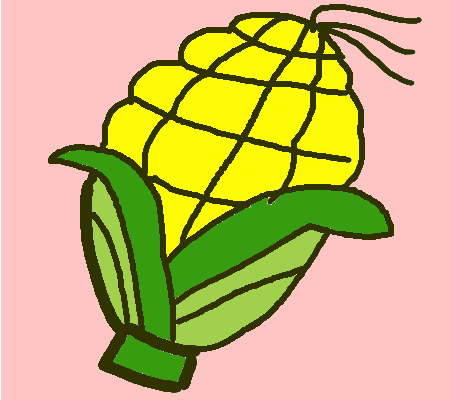

In [1]:
cd ..

/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_references/RebelCa
> nal157781-V1/Program


In [2]:
cd ..

/Users/chengjun/OneDrive - 南京大学/10papers/causal_inference_references/RebelCa
> nal157781-V1


In [4]:
which synth

/Users/chengjun/Library/Application Support/Stata/ado/plus/s/synth.ado
*! version 0.0.7  Jens Hainmueller 01/26/2014


把/Users/chengjun/Library/Application Support/Stata/ado/plus/s/中的synth相关的文件移到/Applications/Stata/ado/base/s/

In [8]:
which synth

/Applications/Stata/ado/base/s/synth.ado
*! version 0.0.7  Jens Hainmueller 01/26/2014


In [17]:
which synthopt.plugin

/Applications/Stata/ado/base/s/synthopt.plugin


In [13]:
**************************************************************************
*** Set up
**************************************************************************
use "Data/Final/rebellion.dta", clear
run "Program/Analysis/generalsetup.do"
graph set window fontface "Cambria"
set scheme s2color





not available in non-GUI version



In [14]:
**************************************************************************
*** FigureA6. Synthetic control estimation
**************************************************************************
replace year=floor((year-1826)/10)*10+1826
collapse (mean) onset_all cntypop1600 alongcanal distance_canal, by(OBJECTID year)
gen ashonset_cntypop1600=asinh(onset_all/(cntypop1600/1000000)) 
gen y=ashonset_cntypop1600
keep if y<.
keep if year>=1776
drop if distance_canal<150 & alongcanal==0
gen interaction1=alongcanal*(year>=1826)


(135,700 real changes made)


(1,053 missing values generated)

(1,053 missing values generated)

(1,053 observations deleted)

(6,968 observations deleted)

(4,256 observations deleted)



In [18]:
synth_runner y y(1776) y(1796) y(1806) y(1816), d(interaction1) gen_var


Estimating the treatment effects
--more--


In [19]:
matrix P = e(pvals_std)

preserve
clear
svmat P, names(matcol)
gen I = 1
reshape long Pc, i(I) j(lead)
drop I
rename Pc p_vals
tempfile temp
save "`temp'.dta", replace
restore

merge m:1 lead using "`temp'.dta", nogenerate
save "Data/Interim/synth10alt.dta", replace





number of observations will be reset to 1
Press any key to continue, or Break to abort
--more--


In [20]:
use "Data/Interim/synth10alt.dta", clear
replace year=year-1826
keep if alongcanal == 1
collapse (mean) p_vals y y_synth, by(year)
gen effect = y - y_synth
keep if year<70
#d ;
twoway 
(connected y year, lpattern(solid) msymbol(C) msize(*0.75) color("4 4 4"))
(connected y_synth year, lpattern(dash) msymbol(T) msize(*0.75) color("119 119 119"))
,
ytitle("Coefficients", size(*0.9)) 
xtitle("Number of years since the 1826 reform", size(*0.9) margin(medsmall))
yline(0(0.1)0.9, lstyle(grid) lwidth(thin) lcolor("235 235 235"))
xline(-50(5)60, lstyle(grid) lwidth(thin) lcolor("235 235 235"))
xline(-5, lpattern(dash) lcolor("128 0 0"))
ylabel(0(0.2)0.8, angle(0) format(%5.1f) labsize(*0.85))
xlabel(-50 "-50" -40 "-40" -30 "-30" -20 "-20" -10 "-10" 0 "10" 10 "20" 20 "30" 30 "40" 40 "50" 50 "60" 60 "70", labsize(*0.85)) 
graphregion(fcolor(gs16) lcolor(gs16)) 
plotregion(lcolor("white") lwidth(*0.9))
legend(label(1 "Canal counties (treated)") label(2 "Synthetic controls") size(*0.85))
;
#d cr
graph export "Results/Figures/figureA6a.pdf", replace



(3,248 real changes made)

(2,254 observations deleted)



(2 observations deleted)

(note:  named style C not found in class symbol, default attributes used)

file /Users/chengjun/.stata_kernel_cache/graph.svg saved as SVG format
file /Users/chengjun/.stata_kernel_cache/graph.pdf saved as PDF format

file Results/Figures/figureA6a.pdf saved as PDF format


In [22]:
graph export "Results/Figures/figureA6a.svg", replace

(file Results/Figures/figureA6a.svg not found)
file Results/Figures/figureA6a.svg saved as SVG format


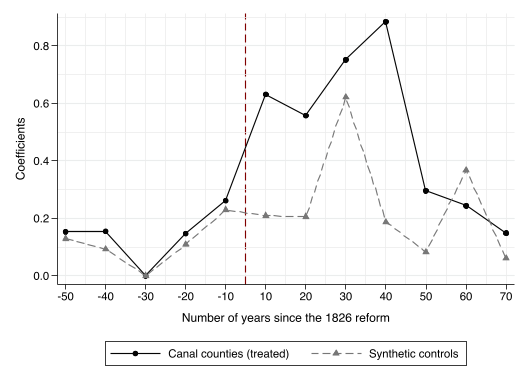

In [31]:
use "Data/Interim/synth10alt.dta", clear
replace year=year-1826
keep if alongcanal == 1
collapse (mean) p_vals y y_synth, by(year)
gen effect = y - y_synth
keep if year<70

#d ;
twoway 
(line effect year, yaxis(1) lpattern(solid) color("4 4 4"))
(scatter p_vals year, yaxis(2) msymbol(O) msize(*0.9) color("4 4 4"))
,
ytitle("Treatment effects", axis(1) size(*0.9)) 
ytitle("p-values", axis(2) size(*0.9))
xtitle("Number of years since the 1826 reform", size(*0.9) margin(medsmall))
yline(-0.2(0.1)0.8, lstyle(grid) lwidth(thin) lcolor("235 235 235"))
xline(-50(5)60, lstyle(grid) lwidth(thin) lcolor("235 235 235"))
xline(-5, lpattern(dash) lcolor("128 0 0"))
ylabel(-0.2(0.2)0.8, angle(0) format(%5.1f) labsize(*0.85) axis(1))
ylabel(0(0.2)1, angle(0) format(%5.1f) labsize(*0.85) axis(2))
xlabel(-50 "-50" -40 "-40" -30 "-30" -20 "-20" -10 "-10" 0 "10" 10 "20" 20 "30" 30 "40" 40 "50" 50 "60" 60 "70", labsize(*0.85)) 
graphregion(fcolor(gs16) lcolor(gs16)) 
plotregion(lcolor("white") lwidth(*0.9))
legend(label(1 "Treatment effects") label(2 "P-values") size(*0.85))
;
#d cr
graph export "Results/Figures/figureA6b.pdf", replace



(3,248 real changes made)

(2,254 observations deleted)



(2 observations deleted)


file /Users/chengjun/.stata_kernel_cache/graph3.svg saved as SVG format
file /Users/chengjun/.stata_kernel_cache/graph3.pdf saved as PDF format

file Results/Figures/figureA6b.pdf saved as PDF format


In [32]:
graph export "Results/Figures/figureA6b.png", replace

file Results/Figures/figureA6b.png written in PNG format


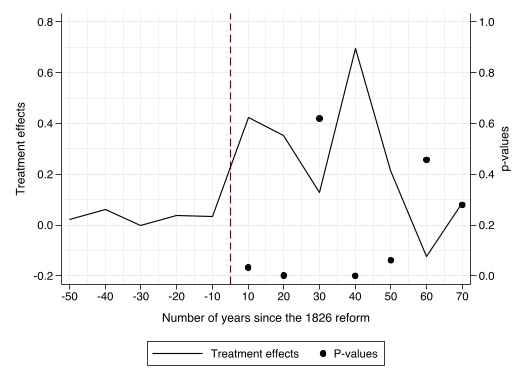

Note. The figure depicts the estimates using the synthetic control method. The dependent variable is the inverse hyperbolic sine transformation of the number of rebellions normalized by 1600 population. Each synthetic control group is constructed in such a way that it matches the outcome value of the treated unit in each decade before the treatment. 

- Panel A presents the evolution of the treated (solid line) and the synthetic control groups (dashed line). 
- Panel B presents the differences between the treated and the synthetic control groups (referring to the axis on the left), along with the p-values calculated based on a randomization inference (referring to the axis on the right). 

For both panels, the solid vertical line in both panels represent the 1826 treatment date, and the periods are grouped every 10 years relative to 1826 (i.e., represents the 1821–1825 period, represents the 1826–1830 period, etc.. )

In [33]:
**************************************************************************
*** Write to Latex
**************************************************************************
file open f using "Results/Figures/figureA6.tex", write replace
file write f "\begin{figure}[p]\captionsetup{justification=centering,singlelinecheck=false,width=0.8\textwidth}" _n
file write f "\begin{center}" _n
file write f "\caption{Synthetic control estimation}" _n
file write f "\subfloat[Treatment v.s. synthetic control]{\label{subfig:figureA6-a}" _n
file write f "\includegraphics[width=.7\textwidth]{Figures/figureA6a.pdf}}\\" _n
file write f "\subfloat[Treatment effects]{\label{subfig:figureA6-b}" _n
file write f "\includegraphics[width=.7\textwidth]{Figures/figureA6b.pdf}}\\" _n
file write f "\end{center}" _n
file write f "\footnotesize{\textit{Note.} The figure depicts the estimates using the synthetic control method. }" _n
file write f "The dependent variable is the inverse hyperbolic sine transformation of the number of rebellions normalized by 1600 population. "
file write f "Each synthetic control group is constructed in such a way that it matches the outcome value of the treated unit in each decade before the treatment. "
file write f "Panel A presents the evolution of the treated (solid line) and the synthetic control groups (dashed line). "
file write f "Panel B presents the differences between the treated and the synthetic control groups (referring to the axis on the left), along with the p-values calculated based on a randomization inference (referring to the axis on the right). "
file write f "For both panels, the solid vertical line in both panels represent the 1826 treatment date, and the periods are grouped every 10 years relative to 1826 (i.e., ``-5'' represents the 1821--1825 period, ``5'' represents the 1826--1830 period, etc.. )  "
file write f "\end{figure}" _n
file close f


(file Results/Figures/figureA6.tex not found)
















